# DVATIHCRBMCS136C
Data Visualization of All the Times I Hit the Compile and Run Button in My CS136 Class

Data from `/home/user/.seashell/seashell.log` on `student.cs.uwaterloo.ca`

## Setup Libraries and Parse Data

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime as dt
from datetime import timedelta as td

# preprocess data if not already processed
if not os.path.exists('data/out.txt'):
    out = open('data/out.txt', 'w')
    for line in open('data/seashell.log', encoding="utf8").readlines():
        # fish out timestamps from relavant lines
        if "compileAndRunProject" in line:
            dt_str = line.split("]")[0][1:-5]
            out.write(dt_str)
            out.write("\n")
    out.close()

dates = mpl.dates.datestr2num(open("data/out.txt").readlines())
seconds_in_day = 24 * 60 * 60

plt.rcParams["figure.figsize"] = (16, 7)
plt.rcParams["font.size"] = 16
plt.rcParams["font.size"] = 16
plt.rcParams["axes.labelpad"] = 25

def getDate(d):
    return mpl.dates.num2date(d).strftime('%c')

## Stats

In [2]:
print(f"Count: {len(dates)}")
print(f"First: {getDate(dates[0])}")
print(f"Last : {getDate(dates[-1])}\n")

resolution_in_min = 20
bin_count = int(((dates[-1] - dates[0]) * seconds_in_day) / (resolution_in_min * 60))
hist, _ = np.histogram(dates, bin_count)
timespend = td(minutes=resolution_in_min * np.count_nonzero(hist))

print(f"Approximate time spent: {timespend}\n")

delta = np.diff(dates)
dmax = np.argmax(delta)
dmin = np.argmin(delta)

print(f"Largest break between compiles")
print(f"Starting : {getDate(dates[dmax])}")
print(f"Ending   : {getDate(dates[dmax + 1])}\n")

print(f"Smallest break between compiles")
print(f"Starting : {getDate(dates[dmin])}")
print(f"Ending   : {getDate(dates[dmin + 1])}")


Count: 1370
First: Wed Jan  8 11:49:18 2020
Last : Thu Apr  9 22:58:19 2020

Approximate time spent: 2 days, 11:20:00

Largest break between compiles
Starting : Fri Mar 27 16:08:05 2020
Ending   : Tue Apr  7 18:33:32 2020

Smallest break between compiles
Starting : Fri Feb  7 12:05:19 2020
Ending   : Fri Feb  7 12:05:19 2020


## Day of Week

[0 1 2 3 4 5 6]


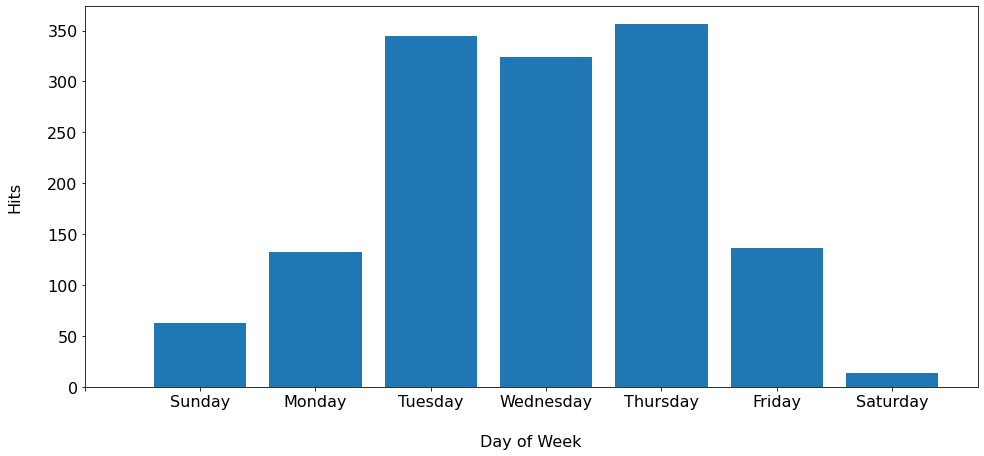

In [3]:
fig, ax = plt.subplots()
ax.set_xlabel("Day of Week")
ax.set_ylabel("Hits")

x = (dates % 7).astype(np.int)
days, counts = np.unique(x, return_counts=True)

print(days)

ax.bar(days, counts)
_ = ax.set_xticks(list(i - 1 for i in range(8)))
_ = ax.set_xticklabels(["", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])

## Time of Day

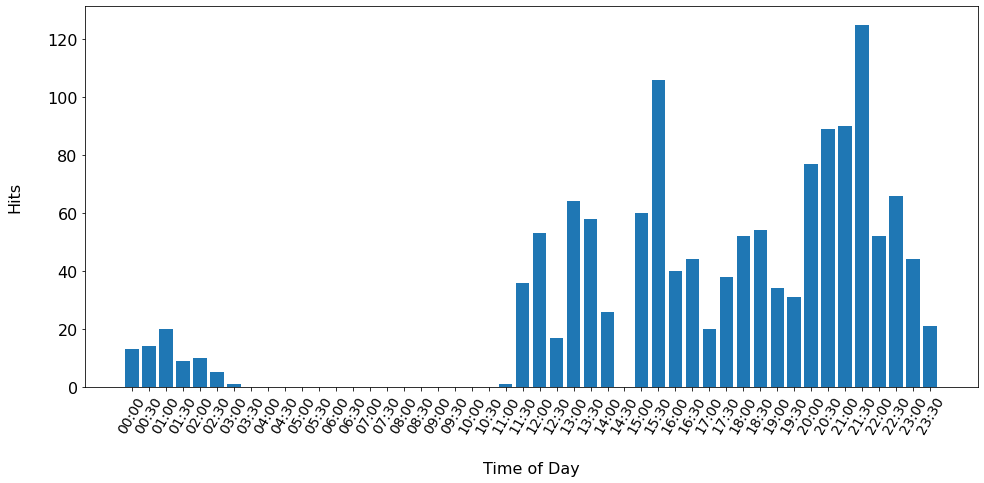

In [4]:
fig, ax = plt.subplots()
ax.set_xlabel("Time of Day")
ax.set_ylabel("Hits")

intervals = 48
bins = np.array([i / intervals for i in range(intervals + 1)])

bined = np.digitize(dates % 1, bins)
times, counts = np.unique(bined, return_counts=True)

ax.bar(times, counts)

labels = [(dt.utcfromtimestamp(time * seconds_in_day).strftime("%H:%M")) for time in bins]

_ = ax.set_xticks(list(i + 1 for i in range(intervals)))
_ = ax.set_xticklabels(labels, {"fontsize": 14})
_ = plt.xticks(rotation=60)

## Heatmap

[[ 0.  0.  0. ...  0.  0. 18.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0. 21.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0. 18.]]


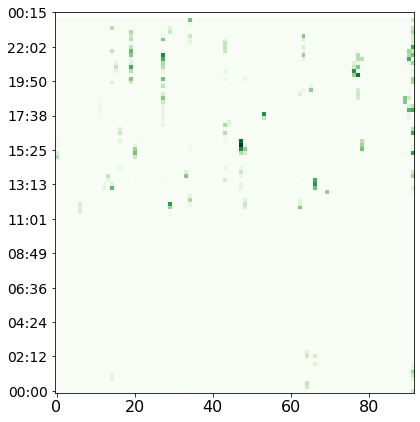

In [9]:
fig, ax = plt.subplots()

time_bins = 96
date_bins = int(dates[-1] - dates[0])
H, yedges, xedges = np.histogram2d(dates % 1, dates, (time_bins, date_bins))

ax.imshow(H, cmap='Greens', interpolation='nearest')

y_ticks = np.linspace(0, len(yedges), 12)
labels = [(dt.utcfromtimestamp(time * seconds_in_day / time_bins).strftime("%H:%M")) for time in y_ticks]
_ = ax.set_yticks(y_ticks)
_ = ax.set_yticklabels(labels, {"fontsize": 14})
ax.invert_yaxis()